In [1]:
%matplotlib inline

import os
import keras
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from os.path import join
from keras.models import Model
from tensorflow import keras
from keras import backend as BD
from keras.regularizers import l2
from scipy.stats import reciprocal
from keras.models import Sequential
from matplotlib.pyplot import imshow
from keras.applications import VGG16
from keras.applications import VGG19
from keras.preprocessing import image
from keras.applications import MobileNetV2
from keras.layers import Conv2D, MaxPooling2D
from keras_applications.resnet_v2 import ResNet50V2
from sklearn.model_selection import RandomizedSearchCV
from keras_applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization

Using TensorFlow backend.


In [2]:
# Inidcating That it is necessary for any hash based algorithms to produce reproducable values 
os.environ['PYTHONHASHSEED'] = '1'
np.random.seed(42) # Seed for numpy random numbers
random.seed(42) # Seed for python 
tf.random.set_seed(42) # Seed for tensorflow
# We need to force tensorflow to use single thread for getting reproducable results
# Because multiple threads will effect the reproducability (getting the same results everytime)
# Cur_Session = tf.compat.v1.Session(graph = tf.get_default_graph(), config = session_conf)
# BD.set_session(Cur_Session)

In [3]:
# preliminary data Exploration 
hair_colours = ['black', 'blond', 'brown', 'gray']
dataset_directory = 'C:\\Users\\suhas\\Documents\\study\\ML Practice\\image_dataset'  ## CHANGE TO YOUR OWN DIRECTORY

images_train = np.load(join(dataset_directory, 'train_images.npy')) # loading images_train
labels_train = np.load(join(dataset_directory, 'train_labels.npy')) # loading labels_train

images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))
files_val = np.load(join(dataset_directory, 'val_files.npy'))

images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))
files_test_public = np.load(join(dataset_directory, 'test_public_files.npy'))

In [4]:
image_size = 48
images_train_rs = images_train.reshape([-1, image_size, image_size, 3]) / 255.0 # Normalizing the values
images_val_rs = images_val.reshape([-1, image_size, image_size, 3]) / 255.0 # Normalizing the values
images_test_public_rs = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0 # normalizing the values
print("Train Data Shape:", images_train_rs.shape)
print("Validation Data Shape:", images_val_rs.shape)
print("Test Data Shape:", images_test_public_rs.shape)

Train Data Shape: (98479, 48, 48, 3)
Validation Data Shape: (12270, 48, 48, 3)
Test Data Shape: (11921, 48, 48, 3)


In [5]:
num_classes = len(hair_colours) # no of classes
labels_train_rs = keras.utils.to_categorical(labels_train, num_classes) # Generating a One hot vector for the Train labels Data
labels_val_rs = keras.utils.to_categorical(labels_val, num_classes) # Generating One Hot vector for the Validation Data
print("Train Labels Shape:", labels_train_rs.shape)
print("Validation Labels Shape:", labels_val_rs.shape)

Train Labels Shape: (98479, 4)
Validation Labels Shape: (12270, 4)


In [72]:
CNN1 = keras.models.Sequential([
   
    keras.layers.Conv2D(32, 3, activation="elu", padding="same", input_shape=[48,48,3]),
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(2),
        
    keras.layers.Conv2D(64, 3, activation="elu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(2),    
    
    keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation = "relu"),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(num_classes, activation="softmax")    
])


CNN1.summary()



CNN1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_26 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
average_pooling2d_15 (Averag (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_27 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
average_pooling2d_16 (Averag (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 12, 12, 64)       

In [73]:
CNN1_Output = CNN1.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=10,
                       validation_data=(images_val_rs, labels_val_rs))

Epoch 1/10
329/329 [==============================] - 16s 50ms/step - loss: 0.4715 - accuracy: 0.8171 - val_loss: 1.0159 - val_accuracy: 0.5753
Epoch 2/10
329/329 [==============================] - 16s 49ms/step - loss: 0.3248 - accuracy: 0.8776 - val_loss: 0.3233 - val_accuracy: 0.8770
Epoch 3/10
329/329 [==============================] - 16s 49ms/step - loss: 0.2934 - accuracy: 0.8898 - val_loss: 0.3408 - val_accuracy: 0.8706
Epoch 4/10
329/329 [==============================] - 16s 49ms/step - loss: 0.2698 - accuracy: 0.8981 - val_loss: 0.2867 - val_accuracy: 0.8910
Epoch 5/10
329/329 [==============================] - 16s 49ms/step - loss: 0.2475 - accuracy: 0.9067 - val_loss: 0.2755 - val_accuracy: 0.8965
Epoch 6/10
329/329 [==============================] - 16s 49ms/step - loss: 0.2325 - accuracy: 0.9132 - val_loss: 0.3073 - val_accuracy: 0.8839
Epoch 7/10
329/329 [==============================] - 16s 50ms/step - loss: 0.2203 - accuracy: 0.9175 - val_loss: 0.2660 - val_accuracy:

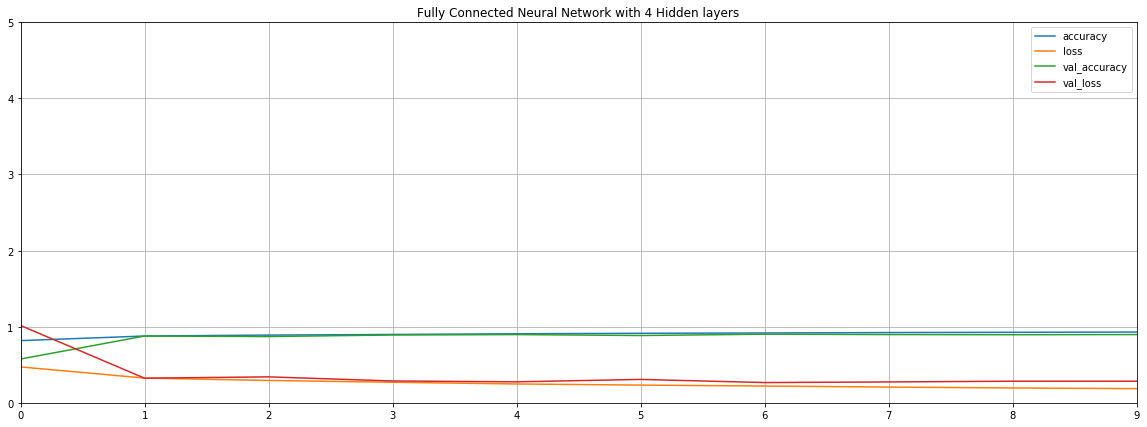

In [74]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(CNN1_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.title("Fully Connected Neural Network with 4 Hidden layers")
plt.show()

In [75]:
CNN1_probabilities = CNN1.predict([images_test_public_rs])

In [76]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(CNN1_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

the first five Predicted classes are: [0 1 0 ... 0 0 1]
Length of Predicted labels: 11921


In [ ]:
## CNN with Selu

In [64]:
CNN_S = keras.models.Sequential([
   
    keras.layers.Conv2D(32, 5, activation="selu", padding="same", input_shape=[48,48,3]),
    keras.layers.Conv2D(32, 5, activation="selu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(64, 3, activation="selu", padding="same"),
    keras.layers.Conv2D(64, 3, activation="selu", padding="same"),
    keras.layers.MaxPooling2D(2),    
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, 3, activation="selu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = "selu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation = "selu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(num_classes, activation="softmax")    
])


CNN_S.summary()

opt = keras.optimizers.Adam(learning_rate=0.0005)

CNN_S.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 48, 48, 32)        2432      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 48, 48, 32)        25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 24, 24, 64)      

In [65]:
CNN_S_Output = CNN_S.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=15,
                       validation_data=(images_val_rs, labels_val_rs))

Epoch 1/15
329/329 [==============================] - 41s 124ms/step - accuracy: 0.7336 - loss: 0.9315 - val_loss: 2.7358 - val_accuracy: 0.4482
Epoch 2/15
329/329 [==============================] - 40s 120ms/step - accuracy: 0.8240 - loss: 0.5209 - val_loss: 0.5574 - val_accuracy: 0.8001
Epoch 3/15
329/329 [==============================] - 40s 121ms/step - accuracy: 0.8598 - loss: 0.3933 - val_loss: 0.7418 - val_accuracy: 0.7623
Epoch 4/15
329/329 [==============================] - 40s 121ms/step - accuracy: 0.8773 - loss: 0.3397 - val_loss: 0.3193 - val_accuracy: 0.8823
Epoch 5/15
329/329 [==============================] - 40s 122ms/step - accuracy: 0.8880 - loss: 0.3052 - val_loss: 0.3882 - val_accuracy: 0.8570
Epoch 6/15
329/329 [==============================] - 40s 122ms/step - accuracy: 0.8961 - loss: 0.2839 - val_loss: 0.3842 - val_accuracy: 0.8550
Epoch 7/15
329/329 [==============================] - 40s 121ms/step - accuracy: 0.9006 - loss: 0.2709 - val_loss: 0.2586 - val_ac

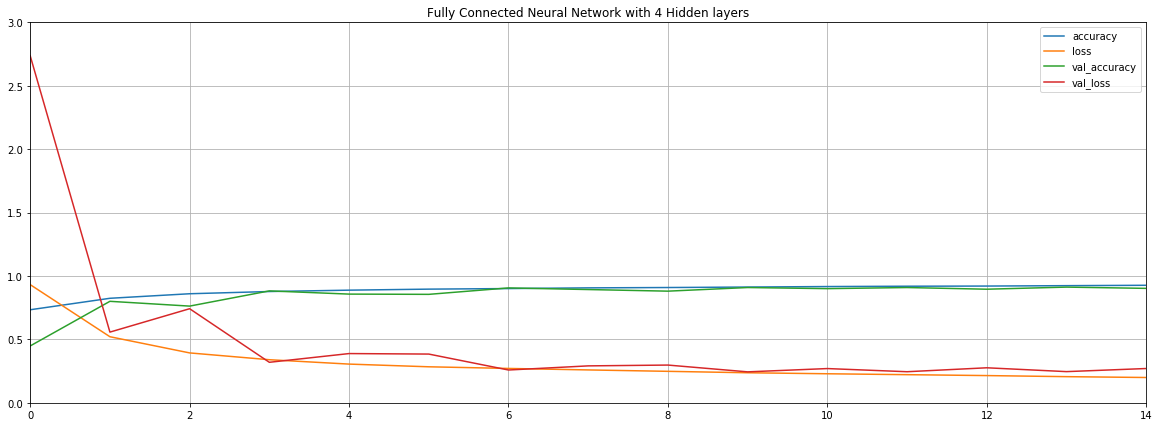

In [66]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(CNN_S_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 3)
plt.title("Fully Connected Neural Network with 4 Hidden layers")
plt.show()

In [67]:
CNN_S_probabilities = CNN_S.predict([images_test_public_rs])

In [68]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(CNN_S_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

the first five Predicted classes are: [0 2 0 ... 0 0 2]
Length of Predicted labels: 11921


In [69]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])
df2.tail()

,ID
11916,202595.jpg
11917,202596.jpg
11918,202597.jpg
11919,202598.jpg
11920,202599.jpg


In [70]:
# Joining the two data frames through the index
CNN_S_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [71]:
CNN_S_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\CNN_S_45693242.csv', index = False, header=True)

In [73]:
CNN_S.save("CNN_S.h5")

In [ ]:
# CNNN S with drop out 0.2

In [7]:
## Transfer Learning with VGG16
input_shape = (48,48,3)

In [9]:
vgg = VGG16(input_shape=input_shape, weights='imagenet', include_top=False)
vgg.summary()

58892288/58889256 [==============================] - 66s 1us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_____________________________________________________________

In [12]:
#Freezing all layers in VGG16 so that the weights wont be changed
for layer in vgg.layers:
    layer.trainable = False
    print("The Layer "+layer.name+"is Successfully Frozen")

The Layer input_1is Successfully Frozen
The Layer block1_conv1is Successfully Frozen
The Layer block1_conv2is Successfully Frozen
The Layer block1_poolis Successfully Frozen
The Layer block2_conv1is Successfully Frozen
The Layer block2_conv2is Successfully Frozen
The Layer block2_poolis Successfully Frozen
The Layer block3_conv1is Successfully Frozen
The Layer block3_conv2is Successfully Frozen
The Layer block3_conv3is Successfully Frozen
The Layer block3_poolis Successfully Frozen
The Layer block4_conv1is Successfully Frozen
The Layer block4_conv2is Successfully Frozen
The Layer block4_conv3is Successfully Frozen
The Layer block4_poolis Successfully Frozen
The Layer block5_conv1is Successfully Frozen
The Layer block5_conv2is Successfully Frozen
The Layer block5_conv3is Successfully Frozen
The Layer block5_poolis Successfully Frozen


In [17]:
# We take the output coming from the last layer and feed i to the last newly added layers of our own
vgg_last = vgg.layers[-1].output
new_layer = Flatten()(vgg_last) # Flattening the output layer of vgg
new_layer = Dense(256, activation = "relu", name = "DenseFullyConnected")(new_layer) # new dense layer adding to the vgg
new_layer = Dropout(0.4) (new_layer) # new Drop out layer
new_layer = Dense(num_classes, activation="softmax", name="Predictions") (new_layer) # new output layer adding to the dense layer
model = Model(vgg.input, new_layer) # building the model



# Compiling the model

model.summary()
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [18]:
#https://towardsdatascience.com/cnn-transfer-learning-fine-tuning-9f3e7c5806b2
vgg_Output = model.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=15,
                       validation_data=(images_val_rs, labels_val_rs))

Train on 98479 samples, validate on 12270 samples
Epoch 1/15
98479/98479 [==============================] - 67s 684us/step - loss: 0.7483 - accuracy: 0.6817 - val_loss: 0.6622 - val_accuracy: 0.7213
Epoch 2/15
98479/98479 [==============================] - 53s 534us/step - loss: 0.6493 - accuracy: 0.7273 - val_loss: 0.6302 - val_accuracy: 0.7331
Epoch 3/15
98479/98479 [==============================] - 52s 532us/step - loss: 0.6248 - accuracy: 0.7382 - val_loss: 0.6298 - val_accuracy: 0.7310
Epoch 4/15
98479/98479 [==============================] - 52s 531us/step - loss: 0.6093 - accuracy: 0.7466 - val_loss: 0.6049 - val_accuracy: 0.7478
Epoch 5/15
98479/98479 [==============================] - 52s 531us/step - loss: 0.5971 - accuracy: 0.7520 - val_loss: 0.5976 - val_accuracy: 0.7503
Epoch 6/15
98479/98479 [==============================] - 52s 531us/step - loss: 0.5870 - accuracy: 0.7559 - val_loss: 0.6037 - val_accuracy: 0.7437
Epoch 7/15
98479/98479 [==============================] 

In [ ]:
# VGG19

In [47]:
vgg = VGG19(input_shape=input_shape, weights='imagenet', include_top=False)
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [48]:
#Freezing all layers in VGG16 so that the weights wont be changed
for layer in vgg.layers:
    if layer.name == 'block3_conv1':
        break
    layer.trainable = False
    print("The Layer "+layer.name+" is Successfully Frozen")

The Layer input_5 is Successfully Frozen
The Layer block1_conv1 is Successfully Frozen
The Layer block1_conv2 is Successfully Frozen
The Layer block1_pool is Successfully Frozen
The Layer block2_conv1 is Successfully Frozen
The Layer block2_conv2 is Successfully Frozen
The Layer block2_pool is Successfully Frozen


In [49]:
# We take the output coming from the last layer and feed i to the last newly added layers of our own
vgg_last = vgg.layers[-1].output
new_layer = Flatten()(vgg_last) # Flattening the output layer of vgg
new_layer = Dense(1000, activation = "selu", name = "DenseFullyConnected")(new_layer) # new dense layer adding to the vgg
new_layer = Dropout(0.2) (new_layer) # new Drop out layer
new_layer = Dense(num_classes, activation="softmax", name="Predictions") (new_layer) # new output layer adding to the dense layer
model = Model(vgg.input, new_layer) # building the model




# Compiling the model

model.summary()
#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [50]:
#https://towardsdatascience.com/cnn-transfer-learning-fine-tuning-9f3e7c5806b2
vgg_Output = model.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=15,
                       validation_data=(images_val_rs, labels_val_rs))

Train on 98479 samples, validate on 12270 samples
Epoch 1/15
98479/98479 [==============================] - 131s 1ms/step - loss: 1.2156 - accuracy: 0.5322 - val_loss: 0.8487 - val_accuracy: 0.6639
Epoch 2/15
98479/98479 [==============================] - 129s 1ms/step - loss: 0.5054 - accuracy: 0.8066 - val_loss: 0.4007 - val_accuracy: 0.8509
Epoch 3/15
98479/98479 [==============================] - 130s 1ms/step - loss: 0.3604 - accuracy: 0.8651 - val_loss: 0.3306 - val_accuracy: 0.8822
Epoch 4/15
98479/98479 [==============================] - 129s 1ms/step - loss: 0.3026 - accuracy: 0.8887 - val_loss: 0.3160 - val_accuracy: 0.8823
Epoch 5/15
98479/98479 [==============================] - 130s 1ms/step - loss: 0.2738 - accuracy: 0.8986 - val_loss: 0.2802 - val_accuracy: 0.8958
Epoch 6/15
98479/98479 [==============================] - 130s 1ms/step - loss: 0.2469 - accuracy: 0.9088 - val_loss: 0.3656 - val_accuracy: 0.8584
Epoch 7/15
98479/98479 [==============================] - 130s

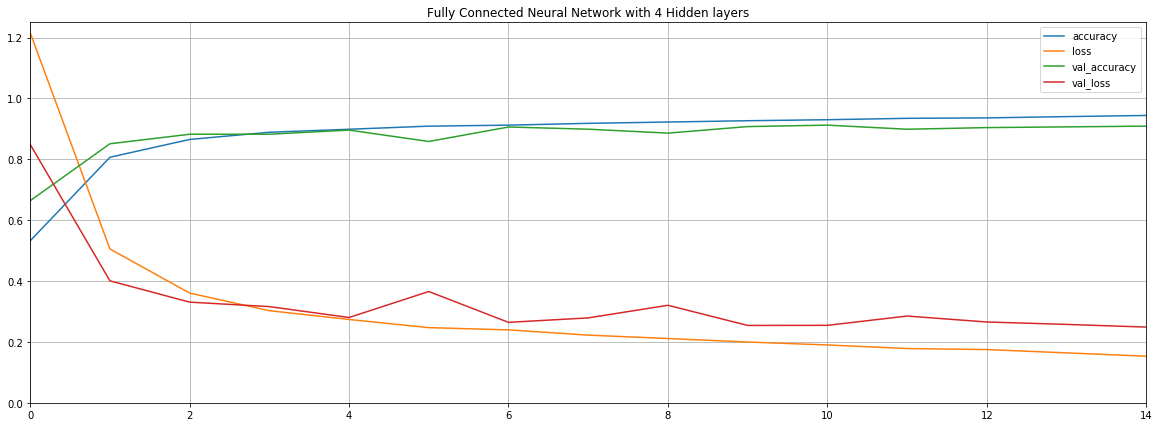

In [53]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(vgg_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.25)
plt.title("Fully Connected Neural Network with 4 Hidden layers")
plt.show()

In [54]:
Vgg_probabilities = model.predict([images_test_public_rs])

In [55]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(Vgg_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

the first five Predicted classes are: [0 2 0 ... 0 0 2]
Length of Predicted labels: 11921


In [56]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])
df2.tail()

,ID
11916,202595.jpg
11917,202596.jpg
11918,202597.jpg
11919,202598.jpg
11920,202599.jpg


In [57]:
# Joining the two data frames through the index
VGG19_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [58]:
VGG19_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\VGG19_45693242.csv', index = False, header=True)

In [60]:
model.save("VGG19.h5")

In [ ]:
## With Data Augmentation on the same model

In [88]:
CNN2 = keras.models.Sequential([
   
    keras.layers.Conv2D(32, 3, activation="elu", padding="same", input_shape=[48,48,3]),
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(2),
        
    keras.layers.Conv2D(64, 3, activation="elu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(2),    
    
    keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation = "relu"),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(num_classes, activation="softmax")    
])
CNN2.summary()
CNN2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_32 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
average_pooling2d_21 (Averag (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_33 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
average_pooling2d_22 (Averag (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 12, 12, 64)      

In [89]:
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range = 0.1,
                             horizontal_flip = True, 
                             fill_mode='nearest')   

In [90]:
x_Train_After_Augmentation = images_train_rs
datagen.fit(x_Train_After_Augmentation)

In [91]:
batch_size = 300

In [92]:
CNN2_Output =   CNN2.fit(datagen.flow(x_Train_After_Augmentation, labels_train_rs, 
                         batch_size),
                         steps_per_epoch = len(x_Train_After_Augmentation)/batch_size,
                         epochs = 10, 
                         validation_data=(images_val_rs, labels_val_rs),
                         verbose=1 )

Epoch 1/10
329/328 [==============================] - 60s 181ms/step - loss: 0.5834 - accuracy: 0.7685 - val_loss: 1.2061 - val_accuracy: 0.4692s - loss: 0.5953 - 
Epoch 2/10
329/328 [==============================] - 57s 174ms/step - loss: 0.4273 - accuracy: 0.8376 - val_loss: 0.3374 - val_accuracy: 0.8745
Epoch 3/10
329/328 [==============================] - 56s 171ms/step - loss: 0.3816 - accuracy: 0.8550 - val_loss: 0.3753 - val_accuracy: 0.8545
Epoch 4/10
329/328 [==============================] - 57s 174ms/step - loss: 0.3558 - accuracy: 0.8660 - val_loss: 0.3075 - val_accuracy: 0.8856
Epoch 5/10
329/328 [==============================] - 57s 172ms/step - loss: 0.3410 - accuracy: 0.8705 - val_loss: 0.3062 - val_accuracy: 0.8835
Epoch 6/10
329/328 [==============================] - 56s 171ms/step - loss: 0.3302 - accuracy: 0.8750 - val_loss: 0.3241 - val_accuracy: 0.8749
Epoch 7/10
329/328 [==============================] - 56s 170ms/step - loss: 0.3200 - accuracy: 0.8796 - val_lo

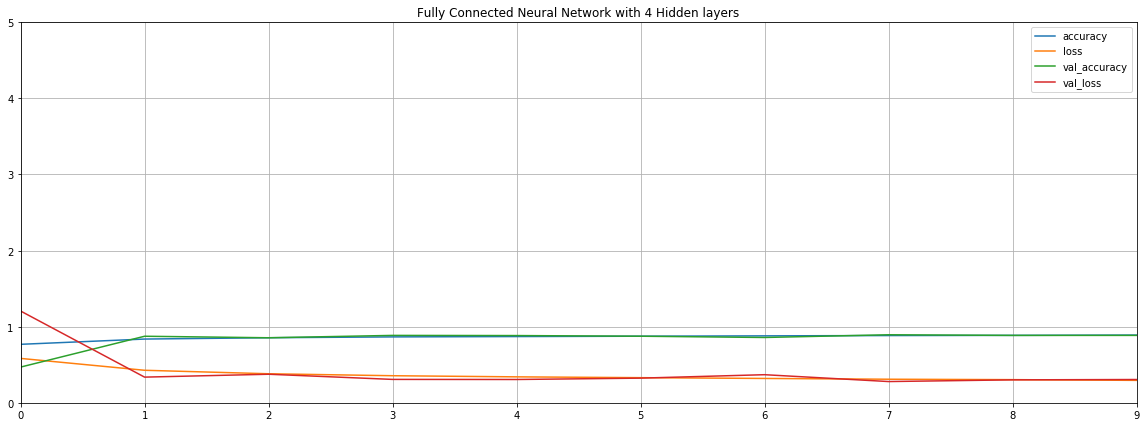

In [94]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(CNN2_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.title("Fully Connected Neural Network with 4 Hidden layers")
plt.show()

In [95]:
# Predicting the Probabilities of which class an image belongs to
FCNN1_probabilities = CNN2.predict([images_test_public_rs])

In [97]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(FCNN1_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

the first five Predicted classes are: [0 2 0 ... 0 0 2]
Length of Predicted labels: 11921


In [98]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])
df2.tail()

,ID
11916,202595.jpg
11917,202596.jpg
11918,202597.jpg
11919,202598.jpg
11920,202599.jpg


In [99]:
# Joining the two data frames through the index
CNN2_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [100]:
CNN2_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\CNN2_45693242.csv', index = False, header=True)

In [93]:
### Transfer Learning

In [119]:
Mobilenetv2 = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=[48,48,3],weights='imagenet', include_top=False)
Mobilenetv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 49, 49, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 24, 24, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 24, 24, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [110]:
Mobilenetv2.trainable = False

In [111]:
Mobilenetv2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 49, 49, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 24, 24, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 24, 24, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [112]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [114]:
prediction_layer = keras.layers.Dense(4)

In [115]:
model = tf.keras.Sequential([
    Mobilenetv2,
    global_average_layer,
    prediction_layer
])

In [116]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 2, 2, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 5124      
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [117]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

In [118]:
model_output = model.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=10,
                       validation_data=(images_val_rs, labels_val_rs))

Epoch 1/10
329/329 [==============================] - 22s 67ms/step - loss: 5.1007 - accuracy: 0.2252 - val_loss: 4.1766 - val_accuracy: 0.3441
Epoch 2/10
329/329 [==============================] - 17s 52ms/step - loss: 7.9340 - accuracy: 0.3892 - val_loss: 5.9776 - val_accuracy: 0.3266
Epoch 3/10
329/329 [==============================] - 17s 52ms/step - loss: 8.5339 - accuracy: 0.3855 - val_loss: 8.3707 - val_accuracy: 0.3266
Epoch 4/10
329/329 [==============================] - 17s 52ms/step - loss: 8.9783 - accuracy: 0.3854 - val_loss: 9.0333 - val_accuracy: 0.3266
Epoch 5/10
329/329 [==============================] - 17s 53ms/step - loss: 9.0240 - accuracy: 0.3855 - val_loss: 8.9595 - val_accuracy: 0.3266
Epoch 6/10
329/329 [==============================] - 17s 52ms/step - loss: 9.2452 - accuracy: 0.3851 - val_loss: 9.2522 - val_accuracy: 0.3266
Epoch 7/10
329/329 [==============================] - 17s 52ms/step - loss: 9.2983 - accuracy: 0.3855 - val_loss: 9.5504 - val_accuracy: